# Titanic Survive ML Project

* we are going to cover:
* 1. Probelem defination
* 2. Data
* 3. Evaluation
* 4. Features
* 5. Modelling Experiment
* 6. Experiment

 ## 1.Problem Defination
 we will predict passenger in Titanic can survive Titanic disaster,
 
 ## 2.Data
  There are 2 data set (train and test)
  It is available on kaggle. https://www.kaggle.com/competitions/titanic/data

 ## 3.Evaluation
 It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each in the test set, you must predict a 0 or 1 value for the variable. **Metric**
 Your score is the percentage of passengers you correctly predict. This is known as accuracy.

 ## 4.Features
 you can reach data dict : https://www.kaggle.com/competitions/titanic/data
=0 for them.uthamptonacy.

## Preparing the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Exploration (exploratory data anaylsis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you are working with

What questions are you trying to solve?

* 1.What kind of data do we have and how do we treat different types?
* 2.What missing from the data and how do deal with it?
* 3.Where are the outliers and why should you care about them?
* 4.How can you add, change or remove features to get more out of your data?

In [2]:
df=pd.read_csv("data/train.csv")


In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


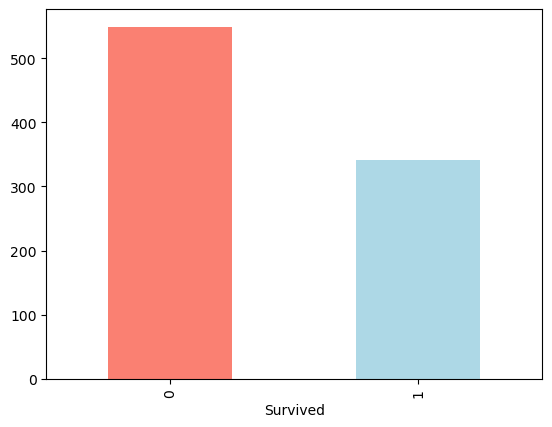

In [7]:
df["Survived"].value_counts().plot.bar(color=["salmon","lightblue"]);

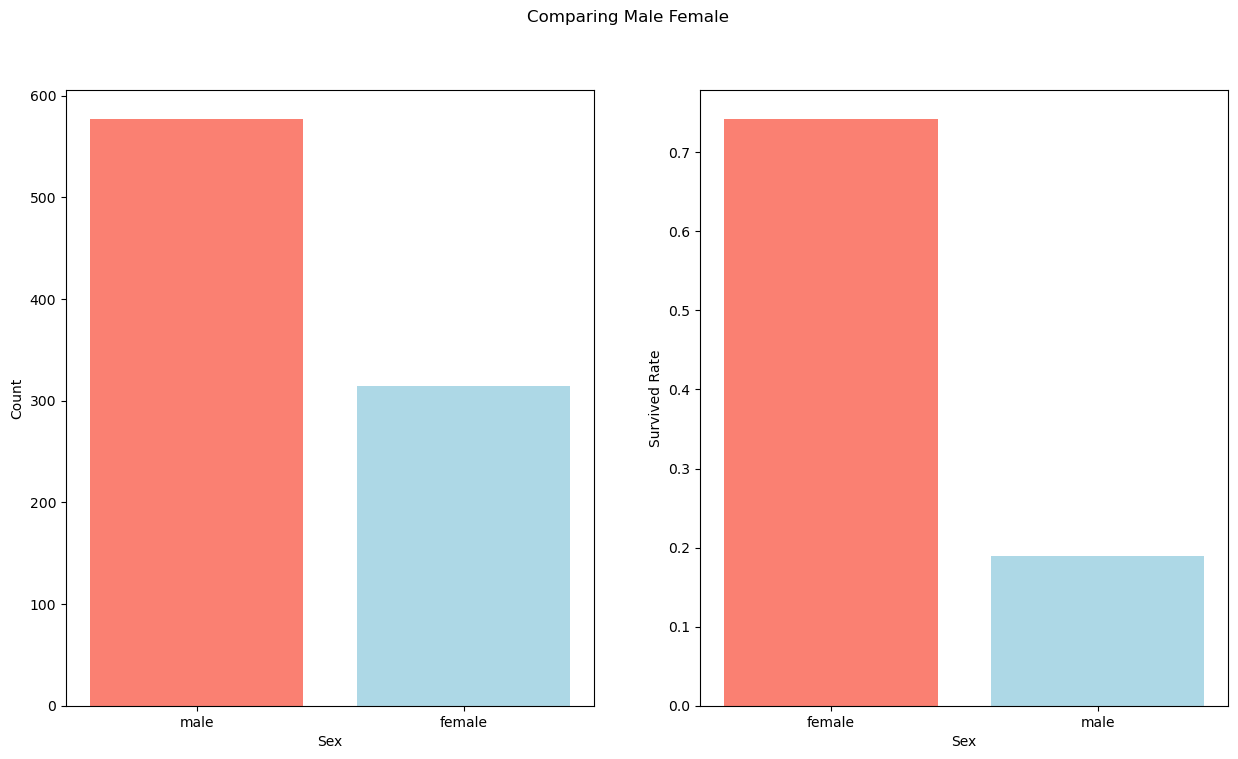

In [8]:
fig,(ax1,ax2)=plt.subplots(figsize=(15,8),nrows=1,ncols=2)
ax1.bar(df.Sex.value_counts().keys(),df.Sex.value_counts().values,color=["salmon","lightblue"])
ax2.bar(x=(df[df["Survived"]==1].Sex.value_counts()/df.Sex.value_counts()).keys(),height=(df[df["Survived"]==1].Sex.value_counts()/df.Sex.value_counts()).values,color=["salmon","lightblue"])
ax1.set(xlabel="Sex",ylabel="Count")
ax2.set(xlabel="Sex",ylabel="Survived Rate")
fig.suptitle("Comparing Male Female");

<Axes: ylabel='Frequency'>

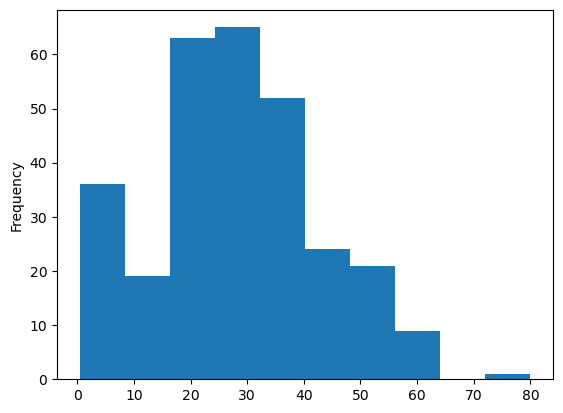

In [9]:
df[df.Survived==1].Age.plot.hist()

In [10]:
df.Pclass.value_counts().keys()

Index([3, 1, 2], dtype='int64', name='Pclass')

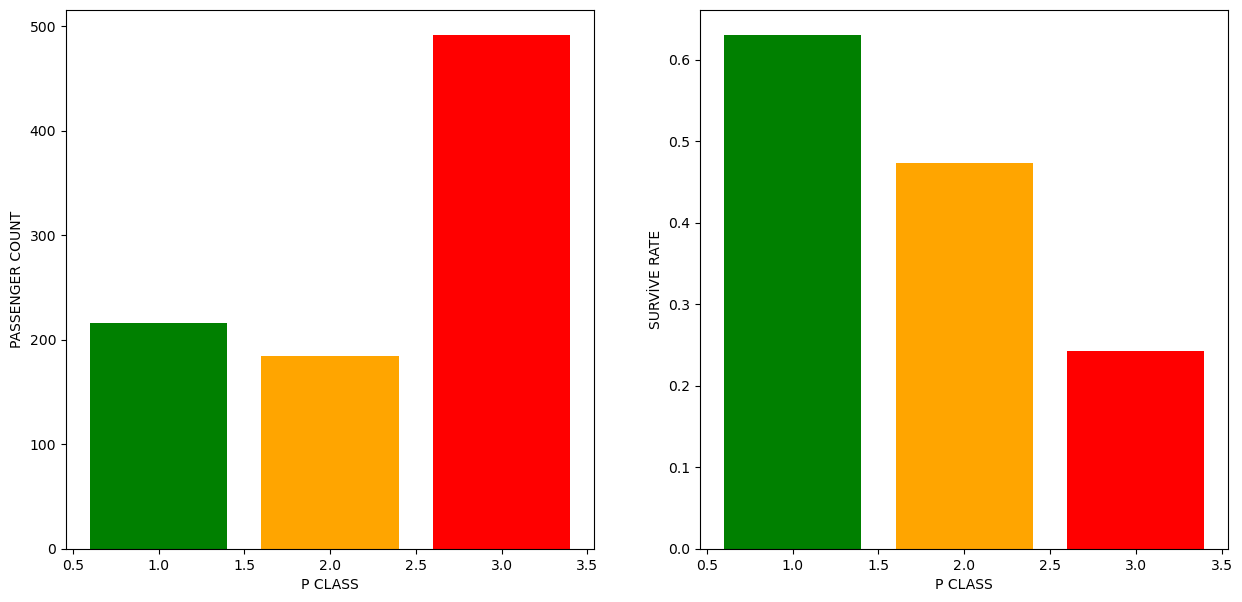

In [11]:
fig,(ax1,ax2)=plt.subplots(figsize=(15,7),nrows=1,ncols=2)
ax1.bar(x=df.Pclass.value_counts().keys(),height=df.Pclass.value_counts().values,color=["red","green","orange"])
ax2.bar((df[df.Survived==1].Pclass.value_counts()/df.Pclass.value_counts()).keys(),height=(df[df.Survived==1].Pclass.value_counts()/df.Pclass.value_counts()).values
      , color=["green","orange","red"])
ax1.set(xlabel="P CLASS",ylabel="PASSENGER COUNT")
ax2.set(xlabel="P CLASS",ylabel="SURVİVE RATE");


In [12]:
(df[df.Survived==1].Pclass.value_counts()/df.Pclass.value_counts()).keys()

Index([1, 2, 3], dtype='int64', name='Pclass')

### Make Correlation Matrix

In [13]:
# we are going to make a corr matrix using numerical columns
df_num=df[["Age","Fare","Parch","SibSp","Pclass","Survived"]]
corr_matrix=df_num.corr()
corr_matrix

,Age,Fare,Parch,SibSp,Pclass,Survived
Age,1.000000,0.096067,-0.189119,-0.308247,-0.369226,-0.077221
Fare,0.096067,1.000000,0.216225,0.159651,-0.549500,0.257307
Parch,-0.189119,0.216225,1.000000,0.414838,0.018443,0.081629
SibSp,-0.308247,0.159651,0.414838,1.000000,0.083081,-0.035322
Pclass,-0.369226,-0.549500,0.018443,0.083081,1.000000,-0.338481
Survived,-0.077221,0.257307,0.081629,-0.035322,-0.338481,1.000000


In [14]:
pip install seaborn

<Axes: >

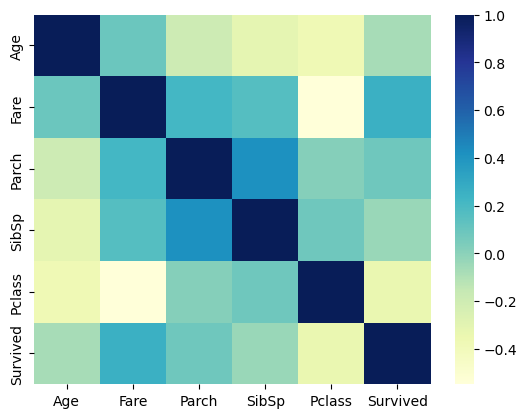

In [15]:
import seaborn as sb
sb.heatmap(corr_matrix,cmap="YlGnBu")

## Manipulating Data

In [16]:

def split_title(names):
    title_list=[]
    for name in names:
        title=title=name.split(",")[1]
        title=title.split(".")[0].strip()
        title_list.append(title)
    return title_list

df["Title"]=split_title(df.Name.values)


In [17]:
def categorize_title(title):
    if title in ['Mr', 'Mrs', 'Ms', 'Miss']:
        return 'Commoner'
    elif title in ['Master', 'Don', 'Lady', 'Sir', 'Jonkheer', 'Dona']:
        return 'Nobility'
    elif title in ['Rev', 'Dr', 'Major', 'Col', 'Capt']:
        return 'Professional'
    elif title in ['Mme', 'Mlle']:
        return 'Royalty'
    else:
        return np.nan

df['TitleGroup'] = df['Title'].apply(categorize_title)

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Commoner
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Commoner
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Commoner
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Commoner
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Commoner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Professional
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Commoner
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Commoner
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Commoner


In [19]:
def split_lastname(names):
    last_names=[]
    for name in names:
        last_name=name.split(",")[0]
        last_names.append(last_name)
    return last_names

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Commoner
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Commoner
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Commoner
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Commoner
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Commoner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Professional
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Commoner
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Commoner
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Commoner


In [21]:
df_temp=df
df_temp.drop("Name",axis=1,inplace=True)
df_temp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleGroup
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Commoner
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Commoner
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Commoner
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,Commoner
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,Commoner
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev,Professional
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss,Commoner
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Commoner
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr,Commoner


In [22]:
def split_cabin_number(cabines):
    cabin_list=[]
    for cabin in cabines:
        if pd.notna(cabin):
            cabin_name=list(cabin)
            cabin_list.append(cabin_name[0])
        else:
            cabin_list.append(cabin)
    return cabin_list
df_temp["CabinCapital"]=split_cabin_number(df_temp.Cabin)

In [23]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Sex           891 non-null    object 
 4   Age           714 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Title         891 non-null    object 
 12  TitleGroup    890 non-null    object 
 13  CabinCapital  204 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [24]:
df_temp.drop("Cabin",axis=1,inplace=True)

In [25]:
df_temp.drop("Ticket",axis=1,inplace=True)
df_temp.drop("Title",axis=1,inplace=True)

<BarContainer object of 8 artists>

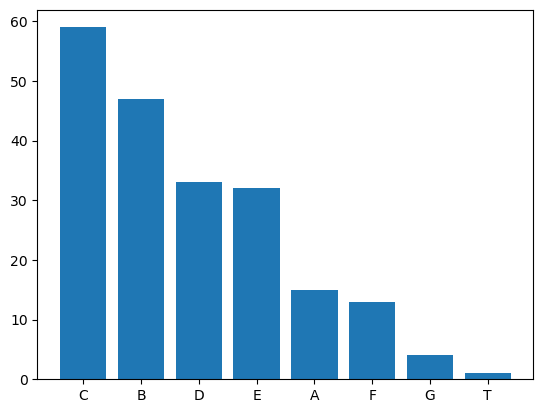

In [26]:

fig,ax=plt.subplots(nrows=1)
ax.bar(x=df.CabinCapital.value_counts().keys(),height=df.CabinCapital.value_counts().values)
 

In [27]:
### passenger ıd is uniqe so we can drop it 
df_temp.drop("PassengerId",axis=1,inplace=True)


## Convert None Numeric into Numeric

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.TitleGroup)
df_temp.TitleGroup=le.transform(df.TitleGroup)
le=LabelEncoder()

In [29]:
df_temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TitleGroup,CabinCapital
0,0,3,male,22.0,1,0,7.2500,S,0,NaN
1,1,1,female,38.0,1,0,71.2833,C,0,C
2,1,3,female,26.0,0,0,7.9250,S,0,NaN
3,1,1,female,35.0,1,0,53.1000,S,0,C
4,0,3,male,35.0,0,0,8.0500,S,0,NaN
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,2,NaN
887,1,1,female,19.0,0,0,30.0000,S,0,B
888,0,3,female,NaN,1,2,23.4500,S,0,NaN
889,1,1,male,26.0,0,0,30.0000,C,0,C


In [30]:
# fill na with median
def fill_na(df):
    df.Age=df.Age.fillna(np.mean(df.Age))
    df.CabinCapital=df.CabinCapital.fillna("missing")
    df.Embarked=df.Embarked.fillna("missing")
    df.Fare=df.Fare.fillna(np.mean(df.Fare))
fill_na(df_temp)

In [31]:
df_temp.isna().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
TitleGroup      0
CabinCapital    0
dtype: int64

In [32]:
df_temp.drop(df_temp[df_temp.CabinCapital=="T"].index,axis=0,inplace=True)
df_temp.drop(df_temp[df_temp.Embarked=="missing"].index,axis=0,inplace=True)

In [33]:
x=df_temp.drop("Survived",axis=1)
y=df.Survived
x.shape,y.shape

((888, 9), (888,))

In [34]:
x.CabinCapital.value_counts()

CabinCapital
missing    687
C           59
B           45
D           33
E           32
A           15
F           13
G            4
Name: count, dtype: int64

In [35]:
#Preprcessing with one hot encoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
def convert_categorical_values(df):
    categorical_features=["Sex","Embarked","CabinCapital"]
    one_hot=OneHotEncoder()
    transformer=ColumnTransformer([("one_hot",
                              one_hot,
                              categorical_features)],
                             remainder="passthrough")
    transformed_train=transformer.fit_transform(df)
    return transformed_train
x=pd.DataFrame(convert_categorical_values(x))

In [36]:
x[14].dtypes

dtype('float64')

## Modelling

In [37]:
#pre processing test data
df_test=pd.read_csv("data/test.csv")
df_test["Title"]=split_title(df_test.Name.values)
df_test['TitleGroup'] = df_test['Title'].apply(categorize_title)
df_test["CabinCapital"]=split_cabin_number(df_test.Cabin)

In [38]:
df_test.drop("Cabin",axis=1,inplace=True)
df_test.drop("Title",axis=1,inplace=True)
df_test.drop("Ticket",axis=1,inplace=True)
df_test.drop("Name",axis=1,inplace=True)
df_test.drop("PassengerId",axis=1,inplace=True)

In [39]:
le=LabelEncoder()
le.fit(df_test.TitleGroup)
df_test.TitleGroup=le.transform(df_test.TitleGroup)
le=LabelEncoder()

In [40]:
fill_na(df_test)

In [41]:
df_test.Embarked.value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [42]:
submisson_x=pd.DataFrame(convert_categorical_values(df_test))
submisson_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,34.50000,0.0,0.0,7.8292,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,47.00000,1.0,0.0,7.0000,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,62.00000,0.0,0.0,9.6875,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,27.00000,0.0,0.0,8.6625,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,22.00000,1.0,1.0,12.2875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,30.27259,0.0,0.0,8.0500,0.0
414,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,39.00000,0.0,0.0,108.9000,1.0
415,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,38.50000,0.0,0.0,7.2500,0.0
416,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,30.27259,0.0,0.0,8.0500,0.0


In [43]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.7921348314606742

In [45]:
def score_model(model_dict):
    score_dict={}
    for name,model in model_dict.items():
        model.fit(X_train,y_train)
        score=model.score(X_test,y_test)
        score_dict[name]=score
    return score_dict
models={"KNeighbors":KNeighborsClassifier(),
       "LogisticRegression":LogisticRegression(max_iter=5),
       "AdaBoostClassifier":AdaBoostClassifier(),
       "RandomForest":RandomForestClassifier(),
       "GaussianProcess":GaussianProcessClassifier()}
score_model(models)


C:\Users\hp\Desktop\ml-course\house-price-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\Desktop\ml-course\house-price-project\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'KNeighbors': 0.6966292134831461,
 'LogisticRegression': 0.7078651685393258,
 'AdaBoostClassifier': 0.8202247191011236,
 'RandomForest': 0.8202247191011236,
 'GaussianProcess': 0.6853932584269663}

In [46]:
from sklearn.model_selection import GridSearchCV
rf_grid={ 'n_estimators': [25, 10, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9],
    "bootstrap":[True,False]}

grid_model=GridSearchCV(RandomForestClassifier(),cv=5,param_grid=rf_grid,verbose=True)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 10, 100, 150]},
             verbose=True)

In [47]:
grid_model.score(X_test,y_test)

0.8033707865168539

In [48]:
predict=grid_model.predict(submisson_x)

In [49]:
a=pd.read_csv("data/test.csv")
a.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [50]:
df_predict=pd.DataFrame({"PassengerId":a.PassengerId,"Survived":predict})

In [51]:
df_predict

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
df_predict.to_csv("data//test_predictions.csv",index=False)

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)